In [4]:
def solution(priorities, location):
    answer = 0
    
    while(True):
        max_num = max(priorities)
        for i in range(len(priorities)):
            if max_num == priorities[i]:
                answer += 1
                priorities[i] = 0
                max_num = max(priorities)
                if i == location:
                    return answer
priorities = [1,1,9,1,1,1]
location = 0
solution(priorities,location)

5

# 첫번째 풀이

## - max 함수를 사용하여 중요도에서의 최댓값을 구하였다. max 함수는 인수로 받은 '자료형' 내에서 최대값을 찾아 반환한다.
## - 만약 i번째 인덱스의 값이 최댓값이면, 이를 출력해야 하므로 answer 를 1 증가시킴. 출력시킨 최댓값은 없애기 보다는 0으로 만들어주자. (여기서는 없애서 리스트 길이를 단축시켜버리면 복잡해져버린다.)
## - 지정한 location이 i와 같다면 answer를 return하자.
## - for문을 다 돌아도 지정한 location의 문자가 출력이 안될수도 있으므로 while(True)를 사용하여 지정한 location의 문자가 출력이 될 때까지 돌린다


In [6]:
def solution(priorities, location):
    queue = [(i,p) for i,p in enumerate(priorities)]
    answer = 0
    while True:
        current = queue.pop(0)
        if any(current[1]<q[1] for q in queue): # 현재 대기 목록에서 맨 앞의 문서의 중요도가 가장 크지 않을 때
            queue.append(current)
        else: # 맨 앞의 문서의 중요도가 가장 크거나 이보다 큰 중요도가 없다. 
            answer += 1
            if current[0] == location:
                return answer
priorities = [1,1,9,1,1,1]
location = 0
solution(priorities,location)

5

# 두 번째 풀이

## - list comprehension 사용. enumerate를 통해 (인덱스, 해당 값)을 리스트의 요소로.
## - 여기서도 while(True): 를 사용하였다. 다만 for문과 중첩하지 않았다. 그래서 첫번째보다 더 좋은 풀이이다.
## - any() 함수: 인자로 받은 반복가능한 자료형(리스트, 튜플, 집합, 딕셔너리, 문자열) 중 단 하나라도 참이 있으면 참을 반환하는 함수이다. any 함수를 쓰면 무척이나 간단해진다. 현재 맨 앞 문서의 중요도보다 큰 중요도가 단 하나라도 존재하는 경우를 일일히 크기를 비교하지 않고 함수 하나로 처리하는 것이다.
## - any가 참이 아닐 때, 즉 맨 앞의 문서의 중요도가 가장 크거나 이보다 큰 중요도가 없을 때 출력을 해야 하므로 answer에 1추가. 만약 현재의 위치(current[0])가 location과 같다면 바로 answer를 return
## - enumerate를 사용하여, 값들을 비교하면서 동시에 인덱스도 location과 비교하였다.


---

# 두 번째 풀이와 비슷한 풀이법을 지닌 문제를 소개하겠다.

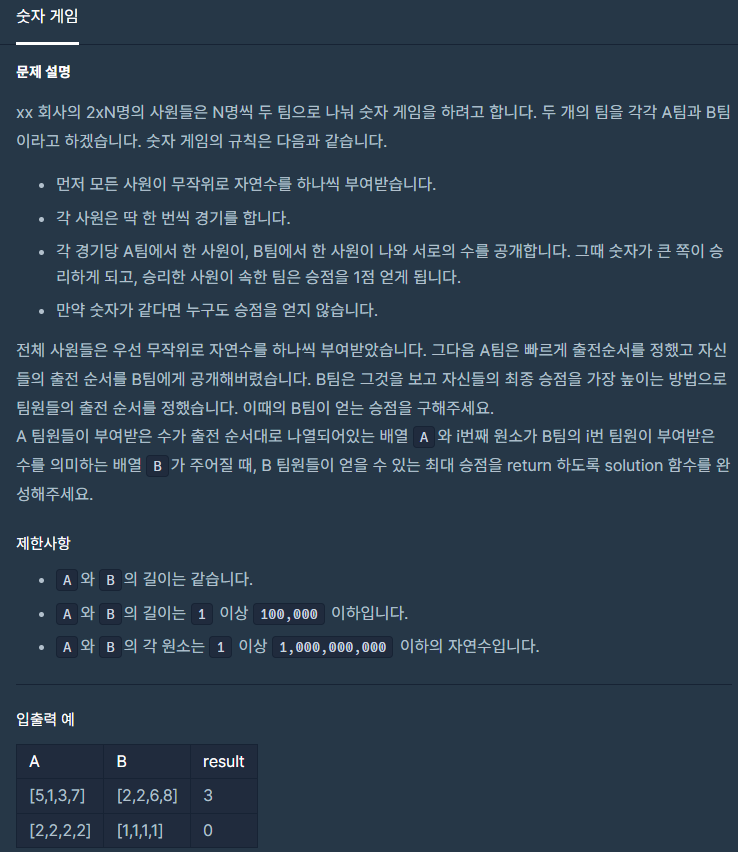

In [8]:
# 숫자게임 풀이
def solution(A, B):
    answer = 0
    A.sort(reverse=True) # 큰 것부터
    B.sort(reverse=True) # 큰 것부터
    
    for a in A:
        if a>=B[0]: # 이 경우 이길 수 있는 방법이 없음. 무조건 승점 확보 실패
            continue
        else:  #위 경우를 제외하는 모든 경우에서는 이길 수 있는 방법이 있음(하나 이상). 
            answer += 1
            del B[0] #가장 큰 값을 제거해 나가야 모든 경우의 수 고려 가능. 
    return answer

# - 위 문제도 고려해야 할 경우의 수가 엄청 많은 것처럼 느껴질 수 있지만, 사실 한가지 경우와 그 외의 경우로만 나누면 깔끔하게 해결될 수 있다.
# - 중요한 것은 경우의 수를 단축시키는 것 같다.  

# + all() 함수: 인자로 받은 반복가능한자료형(iterable)의 모든 요소가 참이면 True 반환. 인자로 받은 요소가 비어있어도 True 반환
